In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import math  
df=pd.read_csv("Downloads/dataset_FLD.csv",header = None)

In [49]:
df0=df[df[3]==0] #spilt the dataframe df into 2
df1=df[df[3]==1]
df0=df0.iloc[:, 0:3]
df1=df1.iloc[:, 0:3]

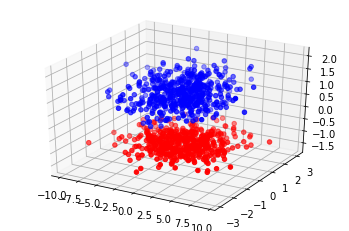

In [50]:
#visualize 3D scatter plot of points
fig0=plt.figure()
ax = fig0.gca(projection='3d')
ax.scatter3D(df0[0], df0[1], df0[2], color = "red")
ax.scatter3D(df1[0], df1[1], df1[2], color = "blue")

In [51]:
m0=df0.mean(axis=0)
sub0=df0-m0
m1=df1.mean(axis=0)
sub1=df1-m1  
mean=m1-m0              
sw=sub0.T.dot(sub0)+sub1.T.dot(sub1)
#print(sw)
sw=np.linalg.inv(sw)
w=(sw).dot(m1-m0)     
#print("vector w")
#print(w)

a,b,c=w[0],w[1],w[2]
denom=math.sqrt(a*a+b*b +c*c)
w_unit=[a/(denom),b/denom,c/denom]
w_unit=np.array(w_unit, dtype=np.float)
print("Unit vector ", w_unit)

w=w_unit

project_0=w.dot(df0.T)    #projecting the points onto w vector
project_1=w.dot(df1.T)
df_cp=df.iloc[:,0:3]
project=w.dot(df_cp.T)


#print(w)

Unit vector  [-0.00655686 -0.01823739  0.99981218]


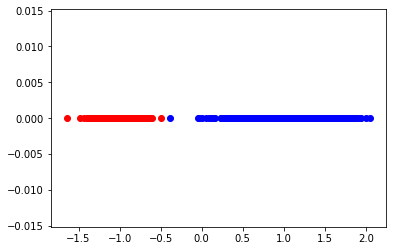

In [52]:
fig1=plt.figure()
plt.scatter(project_0,project_0*0,color='red')
plt.scatter(project_1,project_1*0,color='blue')

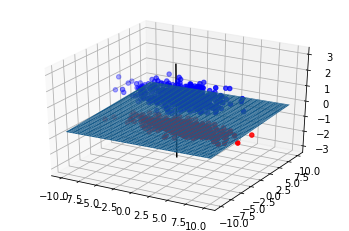

In [53]:
threshold=-0.3893028
a,b,c,d = w[0],w[1],w[2], threshold
#zp = (d - a*xp - b*yp) / c
xp=threshold
yp=0
zp=0

t = np.linspace(-3, 3, 4)
xnew = a*t + xp
ynew = b*t + yp
znew = c*t + zp
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

X,Y = np.meshgrid(x,y)
Z = (d - a*X - b*Y) / c
#plotting the surface
surf = ax.plot_surface(X, Y, Z)

ax.plot3D(xnew, ynew, znew, 'black')
ax.scatter3D(df0[0], df0[1], df0[2], color = "red")
ax.scatter3D(df1[0], df1[1], df1[2], color = "blue")
plt.axvline(x= threshold)
plt.show()

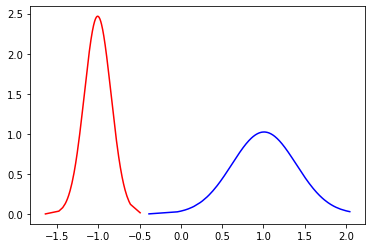

In [54]:
def gaussian(vector,u,std):
    norm_curve=[]
    a=0
    pi=math.pi
    for i in vector:
        a=((i-u)**2)/(2*(std**2))
        e=math.exp(-a)
        norm_curve.append((1/(std*math.sqrt(2*pi))) * e)
    return norm_curve

##forming the normal curves and plotting them
project_1.sort()
project1_mean = np.mean(project_1)
project1_std = np.std(project_1)
pdf1=gaussian(project_1, project1_mean, project1_std)
plt.plot(project_1, pdf1,color="blue") 
project_0.sort()
project0_mean = np.mean(project_0)
project0_std = np.std(project_0)
pdf0=gaussian(project_0, project0_mean, project0_std)
plt.plot(project_0, pdf0,color="red") 
plt.show()

    


In [55]:
def solve(m1,m2,std1,std2): #function to solve for the roots for intersection point of normal curves
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])
result=solve(project0_mean,project1_mean,project0_std,project1_std)
result



array([-2.46345651, -0.3893028 ])

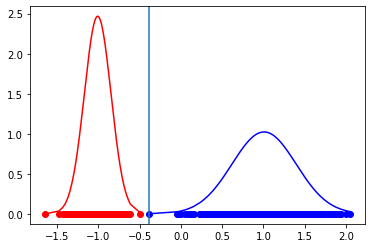

In [56]:
import matplotlib.mlab as mlab
plt.plot(project_0,project_0*0,'o',color="red")
plt.plot(project_1,project_1*0,'o',color="blue")
plt.plot(project_0, pdf0,color="red")
plt.plot(project_1, pdf1,color="blue")
plt.axvline(x= threshold)

#plot3=plt.plot(result,stats.norm.pdf(result,project1_mean,project1_std),'o',color='black')


In [46]:
threshold=-0.3893028
correct_0=0 
correct_1=0
for x in project_0:
    if x <threshold:
        correct_0+=1
for x in project_1:
    if x> threshold:
        correct_1+=1
correct=correct_0+correct_1
accuracy=correct/1000
print("Accuracy is " ,accuracy*100 , "%")

Accuracy is  100.0 %
